# Research Summary for 06/13

## Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def genPlot(fname,df,l):
    plt.plot(df["time"],df["fidelity"],'o-')
    plt.xlabel("T/Tmin")
    plt.ylabel("Fidelity")
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)

## Analysis of 4 Coupling Speed-Up

Here we will use numerics to see if the 4th degree coupling scheme detailed in the latex summary provides speed-ups for the $CNOT$ and $iSWAP$ gate. While an analytical protocol has not been found, we will use numerics to guide our analysis. 

Starting with the $CNOT$ gate with drives $\{|0\rangle - |1\rangle, |0\rangle - |2\rangle \}$

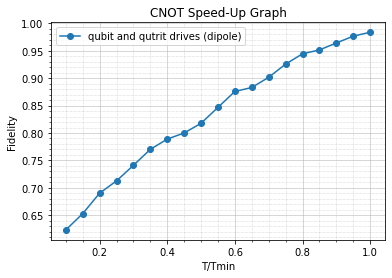

In [2]:
CNOT_dipoleAll = pd.read_csv("../ML_Output/Qutrit_CNOT_Speed_Up_M8_dipoleAll_g1.0.csv",names=["fidelity","time"])
CNOT_dipoleAll.sort_values(by="time",inplace=True)
CNOT_dipoleAll = CNOT_dipoleAll.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Speed-Up Graph",CNOT_dipoleAll,["qubit and qutrit drives (dipole)"])

Comparing this to the qubit $CNOT$ graph, we have 

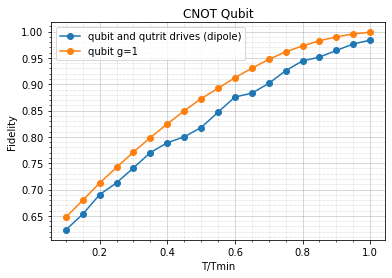

In [3]:
CNOT_DF = pd.read_csv("../Data/CNOT_Qubit/CNOT/CNOT_Qubit.csv",names=["fidelity","time"])
CNOT_DF.sort_values(by="time",inplace=True)
CNOT_DF = CNOT_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Speed-Up Graph",CNOT_dipoleAll,["qubit and qutrit drives (dipole)"])
genPlot("CNOT Qubit",CNOT_DF,["qubit and qutrit drives (dipole)","qubit g=1"])

Here we see that the system *underperforms* the qubit numerics. This is stark contrast to our suspected outcome with a speed-up that matches the $g=2$ qubit numeric. However, this may be due to the drives. Testing with different drives, we have 

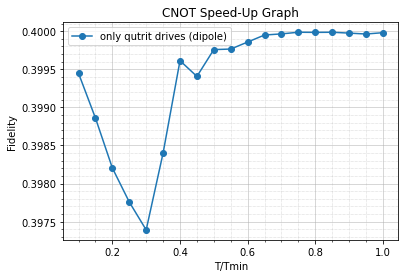

In [4]:
CNOT_dipoleQtd = pd.read_csv("../ML_Output/Qutrit_CNOT_Speed_Up_M8_dipoleQtd_g1.0.csv",names=["fidelity","time"])
CNOT_dipoleQtd.sort_values(by="time",inplace=True)
CNOT_dipoleQtd = CNOT_dipoleQtd.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Speed-Up Graph",CNOT_dipoleQtd,["only qutrit drives (dipole)"])

This is not the wanted outcome at all. Now let's look the different set of drives $\{|0\rangle - |1\rangle,|1\rangle - |2\rangle\}$. 

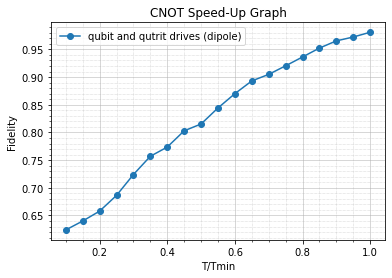

In [5]:
CNOT_all = pd.read_csv("../ML_Output/Qutrit_CNOT_Speed_Up_M8_all_g1.0.csv",names=["fidelity","time"])
CNOT_all.sort_values(by="time",inplace=True)
CNOT_all = CNOT_all.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Speed-Up Graph",CNOT_all,["qubit and qutrit drives (dipole)"])

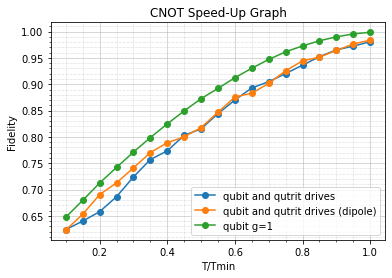

In [24]:
genPlot("CNOT Speed-Up Graph",CNOT_all,["qubit and qutrit drives (dipole)"])
genPlot("CNOT Speed-Up Graph",CNOT_dipoleAll,["qubit and qutrit drives (dipole)"])
genPlot("CNOT Speed-Up Graph",CNOT_DF,["qubit and qutrit drives","qubit and qutrit drives (dipole)","qubit g=1"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_NoSpeedUp.pdf"), format="pdf")

Here we see that with different drives schemes, we see that the $CNOT$ gate does not have a speed-up. 

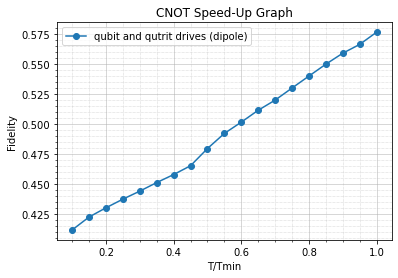

In [7]:
CNOT_qtd = pd.read_csv("../ML_Output/Qutrit_CNOT_Speed_Up_M8_qtd_g1.0.csv",names=["fidelity","time"])
CNOT_qtd.sort_values(by="time",inplace=True)
CNOT_qtd = CNOT_qtd.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Speed-Up Graph",CNOT_qtd,["qubit and qutrit drives (dipole)"])

Here is the calculation with just the $|1\rangle - |2\rangle$ drives and we see similar underperfomance to the dipole qutrit calculation. 

While the $CNOT$ numerics have been unsuccesful, let's test the same for the $iSWAP$ gate. 

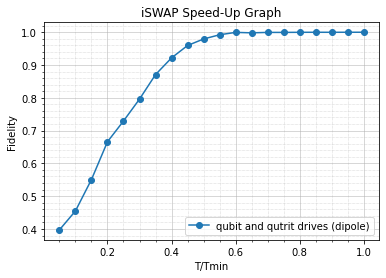

In [8]:
iSWAP_dipoleAll = pd.read_csv("../ML_Output/Qutrit_iSWAP_Speed_Up_M8_dipoleAll_g1.0.csv",names=["fidelity","time"])
iSWAP_dipoleAll.sort_values(by="time",inplace=True)
genPlot("iSWAP Speed-Up Graph",iSWAP_dipoleAll,["qubit and qutrit drives (dipole)"])

Here we *do* see some sort of speed-up. Checking all combinations of drives, we have 

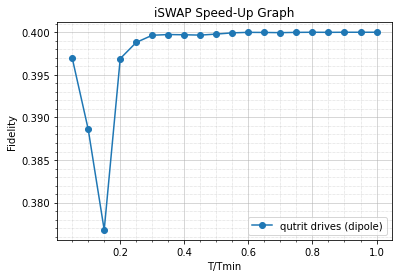

In [9]:
iSWAP_dipoleQtd = pd.read_csv("../ML_Output/Qutrit_iSWAP_Speed_Up_M8_dipoleQtd_g1.0.csv",names=["fidelity","time"])
iSWAP_dipoleQtd.sort_values(by="time",inplace=True)
genPlot("iSWAP Speed-Up Graph",iSWAP_dipoleQtd,["qutrit drives (dipole)"])

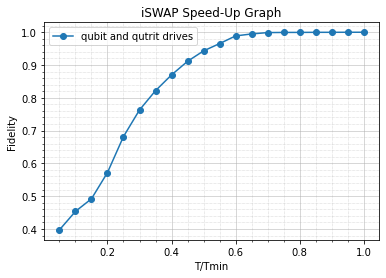

In [10]:
iSWAP_all = pd.read_csv("../ML_Output/Qutrit_iSWAP_Speed_Up_M8_all_g1.0.csv",names=["fidelity","time"])
iSWAP_all.sort_values(by="time",inplace=True)
genPlot("iSWAP Speed-Up Graph",iSWAP_all,["qubit and qutrit drives"])

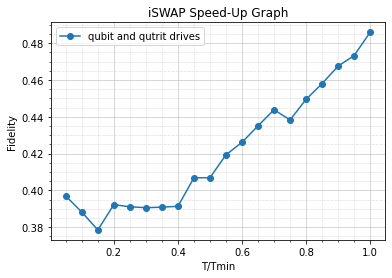

In [11]:
iSWAP_qtd = pd.read_csv("../ML_Output/Qutrit_iSWAP_Speed_Up_M8_qtd_g1.0.csv",names=["fidelity","time"])
iSWAP_qtd.sort_values(by="time",inplace=True)
genPlot("iSWAP Speed-Up Graph",iSWAP_qtd,["qubit and qutrit drives"])

Here we see that both drive sets with qubit and qutrits produce similar results. Comparing these to qubit $iSWAP$ protocols, we have

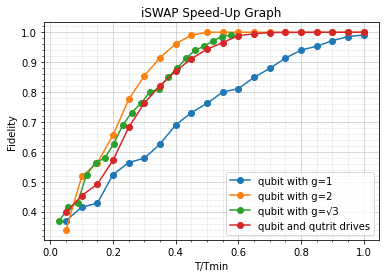

In [12]:
iSWAP_DF = pd.read_csv("../Data/iSWAP_Protocol/qubit.csv",names=["fidelity","time"])
iSWAP_DF.sort_values(by="time",inplace=True)

iSWAP_2DF = pd.read_csv("../ML_Output/Qubit_iSWAP_XX_M8_all_g2.csv",names=["fidelity","time"])
iSWAP_2DF.sort_values(by="time",inplace=True)

qubits_gR2_DF = pd.read_csv("../Data/iSWAP_Protocol/qubit_gRoot2.csv",names=["fidelity","time"])
qubits_gR2_DF.sort_values(by="time",inplace=True)

iSWAP_DFr3 = iSWAP_DF.copy(deep=True)
iSWAP_DFr3["time"] = 1/(np.sqrt(3))*iSWAP_DFr3["time"]

genPlot("iSWAP with Qubit ML",iSWAP_DF,["qubit with g=1"])
genPlot("iSWAP with Qubit ML",iSWAP_2DF,["qubit with g=2"])
genPlot("iSWAP with Qubit ML",iSWAP_DFr3,["qubit with g=\u221A3"])
genPlot("iSWAP Speed-Up Graph",iSWAP_all,["qubit with g=1","qubit with g=2","qubit with g=\u221A3","qubit and qutrit drives"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","iSWAP_FullSpeedUp.pdf"), format="pdf")

Here we see an interesting phenomena. We see that the speed-up for the $iSWAP$ gate is less than the theorized $g=2$, but greater than the $g=\sqrt{2}$. This indicates that more destructive interfere is occuring than the triangle coupling, but less than the maximal value. This may be due to a constricting amount of segments. Increasing the segment number, we have 

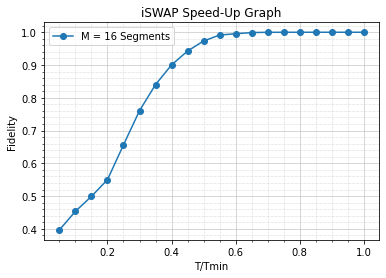

In [13]:
iSWAP_M16 = pd.read_csv("../ML_Output/Qutrit_iSWAP_Speed_Up_M16_all_g1.0.csv",names=["fidelity","time"])
iSWAP_M16.sort_values(by="time",inplace=True)
genPlot("iSWAP Speed-Up Graph",iSWAP_M16,["M = 16 Segments"])

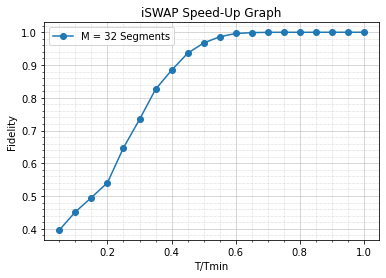

In [14]:
iSWAP_M32 = pd.read_csv("../ML_Output/Qutrit_iSWAP_Speed_Up_M32_all_g1.0.csv",names=["fidelity","time"])
iSWAP_M32.sort_values(by="time",inplace=True)
genPlot("iSWAP Speed-Up Graph",iSWAP_M32,["M = 32 Segments"])

## Full Speed-Up Analysis

Here we will take a look at the full available speed-up using a qutrit system. This includes 8 couplings, detailed in the latex document. Now we have 

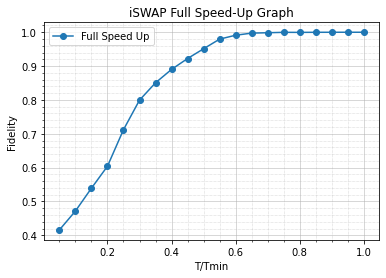

In [15]:
iSWAP_Full = pd.read_csv("../ML_Output/Qutrit_iSWAP_FullSpeed_Up_M8_all_g1.0.csv",names=["fidelity","time"])
iSWAP_Full.sort_values(by="time",inplace=True)
genPlot("iSWAP Full Speed-Up Graph",iSWAP_Full,["Full Speed Up"])

Here we see that the speed up achieved is essentially the same as the previous protocol. 

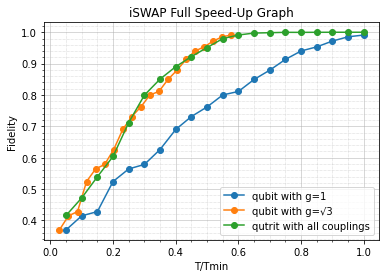

In [16]:
genPlot("iSWAP with Qubit ML",iSWAP_DF,["qubit with g=1"])
genPlot("iSWAP with Qubit ML",iSWAP_DFr3,["qubit with g=\u221A3"])
genPlot("iSWAP Full Speed-Up Graph",iSWAP_Full,["qubit with g=1","qubit with g=\u221A3","qutrit with all couplings"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","iSWAP_AllSpeedUp.pdf"), format="pdf")

We see that speed-up is essentially saturating the $g=\sqrt{2}$ graph. Now let's look at the same case for $CNOT$. 

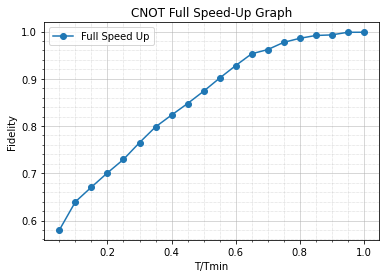

In [17]:
CNOT_Full = pd.read_csv("../ML_Output/Qutrit_CNOT_FullSpeed_Up_M8_all_g1.0.csv",names=["fidelity","time"])
CNOT_Full.sort_values(by="time",inplace=True)
genPlot("CNOT Full Speed-Up Graph",CNOT_Full,["Full Speed Up"])

Here we see that the $CNOT$ achieves some sort of speed-up that was not seen for the previous case. 

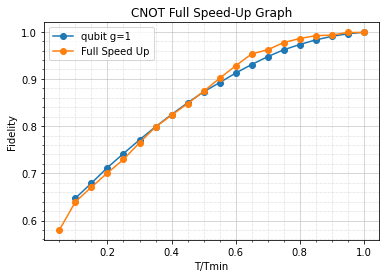

In [18]:
CNOT_DF = pd.read_csv("../Data/CNOT_Qubit/CNOT/CNOT_Qubit.csv",names=["fidelity","time"])
CNOT_DF.sort_values(by="time",inplace=True)
CNOT_DF = CNOT_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",CNOT_DF,["qubit g=1"])
genPlot("CNOT Full Speed-Up Graph",CNOT_Full,["qubit g=1","Full Speed Up"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_AllSpeedUp.pdf"), format="pdf")

Here we see that there is essentially *no speed up* for the $CNOT$ gate with either coupling scheme. 

## Diagonal Entries

Here we will look at whether an optimziation of diagonal entries for a coupling matrix leads to some form of a speed-up. This will be tested for both the $CNOT$ and $iSWAP$ gates. 

Starting with the $CNOT$ gate, we have

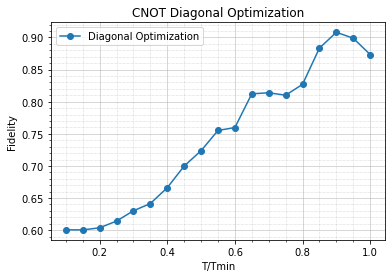

In [19]:
CNOT_Diag = pd.read_csv("../ML_Output/Qutrit_CNOT_Diagonal_M8_all_g1.0.csv",names=["fidelity","time"])
CNOT_Diag.sort_values(by="time",inplace=True)
CNOT_Diag = CNOT_Diag.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Diagonal Optimization",CNOT_Diag,["Diagonal Optimization"])

This is quite bizarre behavior, but this may be an artificat of the optimizer. Let's see if this behavior is also seen in the $iSWAP$. 

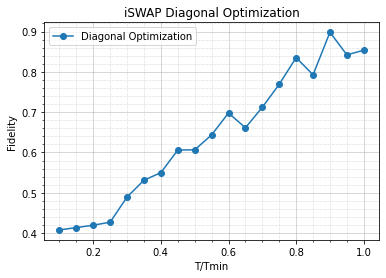

In [20]:
iSWAP_Diag = pd.read_csv("../ML_Output/Qutrit_iSWAP_Diagonal_M8_all_g1.0.csv",names=["fidelity","time"])
iSWAP_Diag.sort_values(by="time",inplace=True)
iSWAP_Diag = iSWAP_Diag.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("iSWAP Diagonal Optimization",iSWAP_Diag,["Diagonal Optimization"])

Here we see that the $CNOT$ gate outperforms the $iSWAP$ gate. There is little intuition behind this behavior. Yet let's compare the $CNOT$ optimization to qubit numerics.

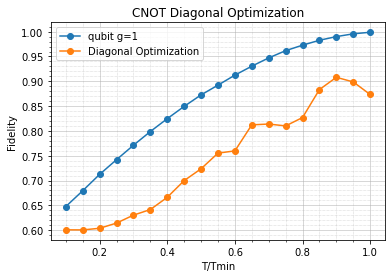

In [21]:
genPlot("CNOT Qubit",CNOT_DF,["qubit g=1"])
genPlot("CNOT Diagonal Optimization",CNOT_Diag,["qubit g=1","Diagonal Optimization"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_Diagonals.pdf"), format="pdf")

Here we see that the $CNOT$ diagonal optimization significantly under-performs the qubit numerics. 

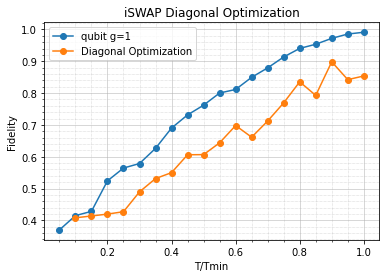

In [22]:
genPlot("CNOT Qubit",iSWAP_DF,["qubit g=1"])
genPlot("iSWAP Diagonal Optimization",iSWAP_Diag,["qubit g=1","Diagonal Optimization"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","iSWAP_Diagonals.pdf"), format="pdf")